In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Analysis

In [2]:
# Loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("../dataset/diabetes.csv")

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
# Getting the satistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

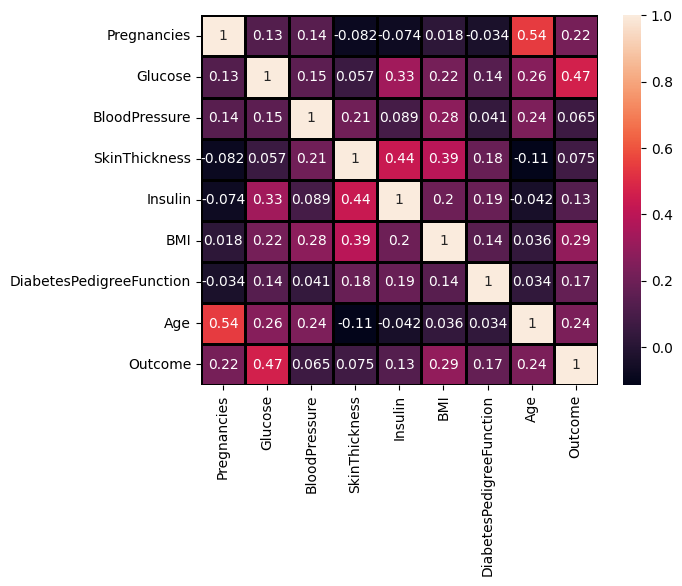

In [9]:
# Coorelation between the variables
sns.heatmap(diabetes_dataset.corr(),annot=True,linewidths=1,linecolor='black')

In [10]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
X = diabetes_dataset.drop('Outcome',axis=1)
y = diabetes_dataset['Outcome']

# Splitting the Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2,stratify=y)

# Data Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the Model

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

# Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

## Training Data

**Accuracy Score**

In [18]:
scores = cross_val_score(clf,X_train,y_train,cv=5)
scores

array([0.7962963 , 0.81481481, 0.73831776, 0.70093458, 0.79439252])

In [19]:
scores.mean()

0.768951194184839

In [20]:
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
training_data_accuracy

0.7821229050279329

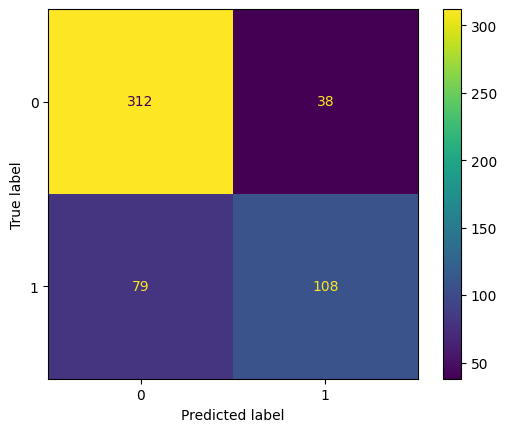

In [21]:
ConfusionMatrixDisplay.from_predictions(y_pred = X_train_prediction, y_true=y_train)

In [22]:
print(classification_report(y_pred = X_train_prediction, y_true=y_train))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       350
           1       0.74      0.58      0.65       187

    accuracy                           0.78       537
   macro avg       0.77      0.73      0.75       537
weighted avg       0.78      0.78      0.77       537



## Test Data

In [23]:
X_test_prediction = clf.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, y_test)
X_test_accuracy

0.7705627705627706

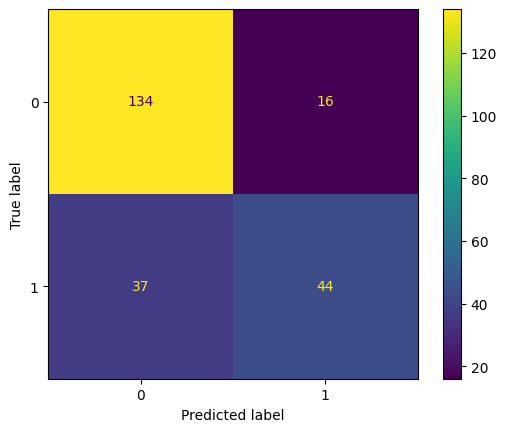

In [24]:
ConfusionMatrixDisplay.from_predictions(y_pred = X_test_prediction, y_true = y_test)

# Saving the model

In [25]:
import pickle

In [26]:
filename = 'diabetes_model.sav'
pickle.dump(clf, open(filename,'wb'))